# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = ["Baton Rouge", "New Orleans", "Clayton", "Las Vegas", "Miami", "Dallas"]

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
    #city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    #if city not in cities:
        #cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create lists for lat, temp (F), humidity(%), cloudiness(%), wind speed (mph)
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each, catch exceptions
print(f'Beginning Data Retrieval \n -----------------------')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count = count + 1
    except KeyError:
        print(f'City not found. Skipping . . .')
    if count == 51: # create sets
        sets = sets + 1
        count = 1 #reset count
        
print(f' ---------------------------- \n Data Retrieval Complete \n ----------------------------')

Beginning Data Retrieval 
 -----------------------
Processing Record 1 of Set 1 | Baton Rouge
Processing Record 2 of Set 1 | New Orleans
Processing Record 3 of Set 1 | Clayton
Processing Record 4 of Set 1 | Las Vegas
Processing Record 5 of Set 1 | Miami
Processing Record 6 of Set 1 | Dallas
 ---------------------------- 
 Data Retrieval Complete 
 ----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create Df
weatherpy_df = pd.DataFrame(list(zip(cities, lat, lng, temp, hum, cloud, wind, country, date)), 
                            columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


#Export City Data into csv file
weatherpy_df.to_csv("weatherpy.csv", index = False)

#Disply dataframe
weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baton Rouge,30.4508,-91.1545,66.00,94,90,6.91,US,1618441937
1,New Orleans,29.9547,-90.0751,68.00,94,90,9.22,US,1618441825
2,Clayton,33.5335,-84.3666,64.99,88,90,9.22,US,1618441752
3,Las Vegas,36.1750,-115.1372,77.00,10,1,8.05,US,1618441885
4,Miami,25.7743,-80.1937,77.00,61,20,11.50,US,1618441563


In [10]:
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00
mean,31.442517,-92.951783,69.996667,69.166667,63.500000,9.593333,1.618442e+09
std,3.573461,12.287027,5.516523,32.114898,41.490963,2.140128,1.304266e+02
min,25.774300,-115.137200,64.990000,10.000000,1.000000,6.910000,1.618442e+09
25%,30.078725,-95.376325,66.247500,62.750000,37.500000,8.342500,1.618442e+09
50%,31.608800,-90.614800,67.495000,78.000000,90.000000,9.220000,1.618442e+09
75%,33.341825,-85.793725,74.750000,92.500000,90.000000,10.930000,1.618442e+09
max,36.175000,-80.193700,77.000000,94.000000,90.000000,12.660000,1.618442e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

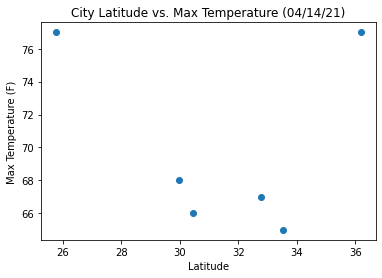

In [12]:
#Create Scatter plot for Temp vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

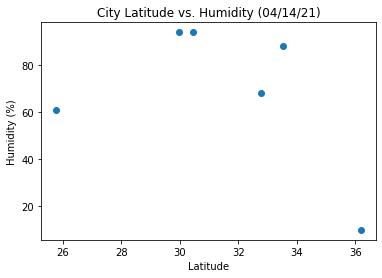

In [14]:
#Create Scatter plot for Humidity vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

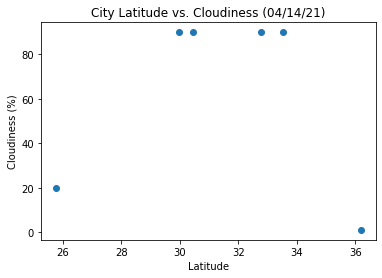

In [15]:
#Create Scatter plot for Cloudiness vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

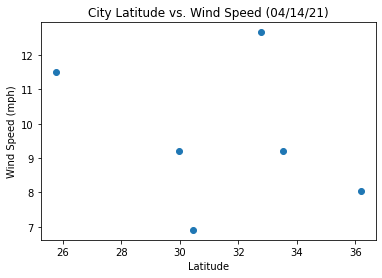

In [16]:
#Create Scatter plot for Wind vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [18]:
northernhem_df = weatherpy_df[weatherpy_df['Lat'] >= 0]
northernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baton Rouge,30.4508,-91.1545,66.00,94,90,6.91,US,1618441937
1,New Orleans,29.9547,-90.0751,68.00,94,90,9.22,US,1618441825
2,Clayton,33.5335,-84.3666,64.99,88,90,9.22,US,1618441752
3,Las Vegas,36.1750,-115.1372,77.00,10,1,8.05,US,1618441885
4,Miami,25.7743,-80.1937,77.00,61,20,11.50,US,1618441563


In [20]:
southernhem_df = weatherpy_df[weatherpy_df['Lat'] < 0]
southernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


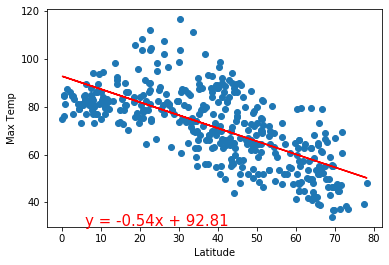

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


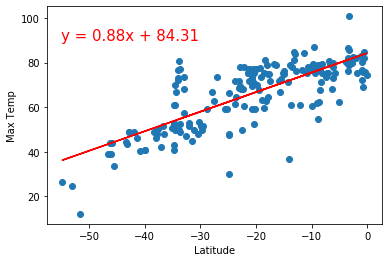

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


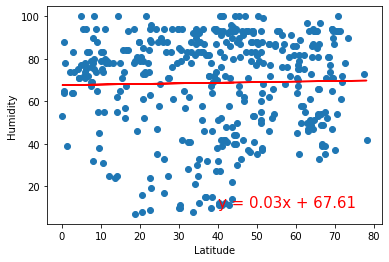

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


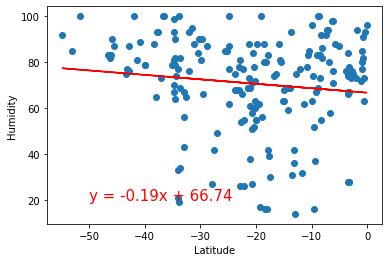

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


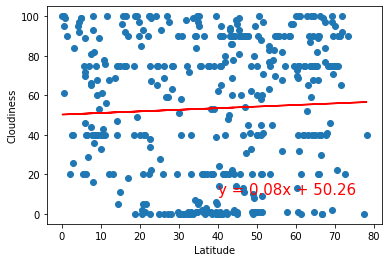

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


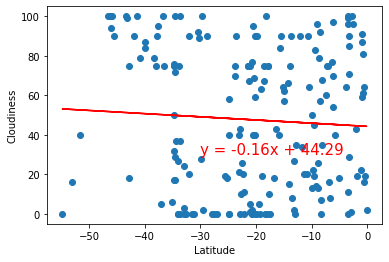

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


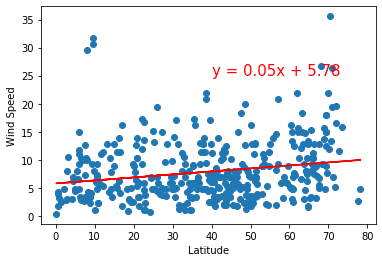

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


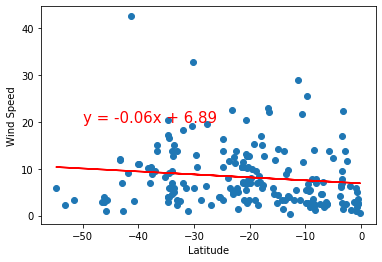